### Importation des modules

In [113]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import cv2
from math import *

### Importation des deux images prises chez moi

Création de listes pour faciliter le traitement après

In [121]:
img1 = mpimg.imread("IMG_20210224_202312.jpg")
img2 = mpimg.imread("IMG_20210224_202311.jpg")

images=[img1,img2,img1,img2]

On peut voir le nombre d'images pour chacune des listes ainsi que la dimmension des images

In [122]:
for i in range(len(images)):
    print(images[i].shape)

(1398, 1397, 3)
(1351, 1401, 3)
(1398, 1397, 3)
(1351, 1401, 3)


Quelques exemples d'images avec le label associé

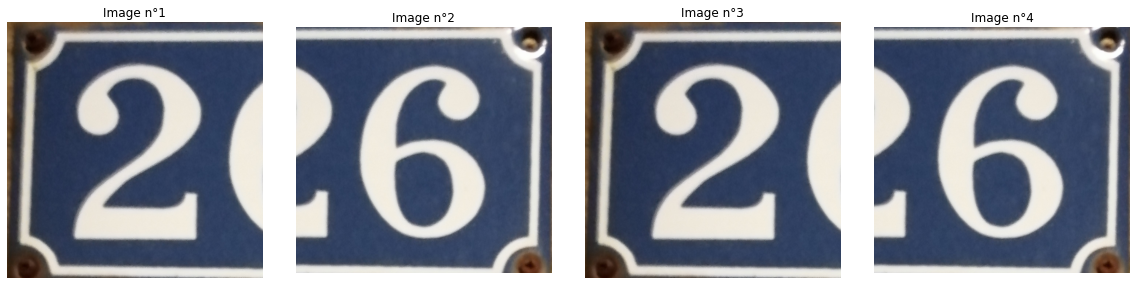

In [123]:
fig=plt.figure(figsize=(16, 16))
colonnes=4
lignes=ceil(len(images)/colonnes)
for i in range(len(images)):
    fig.add_subplot(lignes, colonnes, i+1)
    fig.tight_layout()
    plt.title(f'Image n°{i+1}') 
    plt.axis('off')
    plt.imshow(images[i])


# Traitement des images  
## Redimmensionnement des images

In [134]:
images_resize=[]
for i in range(len(images)):
    images_resize.append(cv2.resize(images[i], dsize=(32,32), interpolation=cv2.INTER_NEAREST))
images_resize=np.array(images_resize)
images_resize.shape

(4, 32, 32, 3)

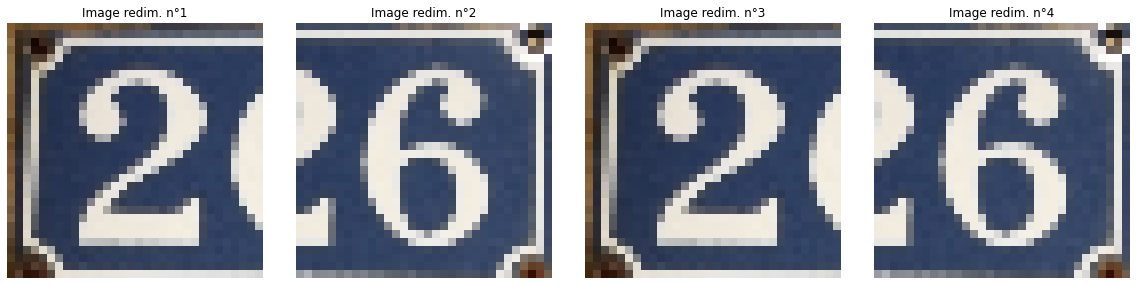

In [164]:
fig=plt.figure(figsize=(16, 16))
for i in range(len(images)):
    fig.add_subplot(lignes, colonnes, i+1)
    fig.tight_layout()
    plt.title(f'Image redim. n°{i+1}') 
    plt.axis('off')
    plt.imshow(images_resize[i])


## Rendu en niveau de gris
Sachant que le niveau de gris vaut: Y = 0.2125 R + 0.7154 G + 0.0721 B

In [136]:
images_bw=[]
for i in range(len(images)):
    images_bw.append(np.zeros((images_resize[i].shape[0:2])))

Conversion en niveau de gris

In [138]:
for i in range(len(images)):
    images_bw[i]=0.2125*images_resize[i,:,:,0] + 0.7154*images_resize[i,:,:,1] + 0.0721*images_resize[i,:,:,2]
    
images_bw=np.array(images_bw)

### Affichage des images en niveau de gris

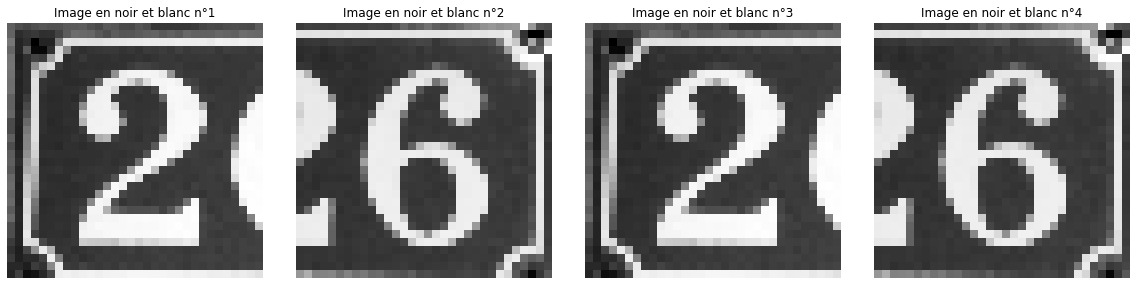

In [166]:
fig=plt.figure(figsize=(16, 16))
for i in range(len(images)):
    fig.add_subplot(lignes, colonnes, i+1)
    fig.tight_layout()
    plt.title(f'Image en noir et blanc n°{i+1}') 
    plt.axis('off')
    plt.imshow(images_bw[i],cmap='gray')

On a bien converti les images en noir et blanc

In [141]:
images_bw.shape

(4, 32, 32)

In [142]:
images_bw[0]

array([[ 94.9805,  78.8553,  71.5158, ...,  77.1422,  76.4951,  91.2636],
       [ 98.5535,  49.0926,  56.3261, ..., 106.444 , 104.7344, 102.0152],
       [116.0564,  42.6089,  51.4761, ..., 225.5029, 223.    , 223.3587],
       ...,
       [ 61.5975,  39.4761,  47.8915, ...,  66.9793,  64.5505,  66.5505],
       [ 46.0167,  46.0281,  36.2348, ...,  69.4708,  68.4708,  71.1804],
       [ 42.3696,  67.4435,  20.9444, ..., 221.8558, 217.8558, 212.    ]])

## Normalisation
Maintenant, il faut normaliser les données avant de les injecter dans le modèle.   
### Calcul de la moyenne des valeurs des pixels et de l'écart type

In [143]:
img_mean=images_bw.mean()
img_std=images_bw.std()
print(img_mean)
print(img_std)

114.65706875000001
73.14089684830007


### Normalisation
On applique z = $\frac{x - mean}{std}$  pour normaliser nos données

In [144]:
images_bw=(images_bw-img_mean)/img_std

### Affichage du tableau correspondant à une image normalisée

In [145]:
images_bw

array([[[-0.2690228 , -0.48949043, -0.58983784, ..., -0.51291234,
         -0.52175965, -0.31984115],
        [-0.22017188, -0.89641325, -0.79751509, ..., -0.11229106,
         -0.13566512, -0.17284268],
        [ 0.01913199, -0.98505996, -0.86382546, ...,  1.51551097,
          1.48129071,  1.48619495],
        ...,
        [-0.72544323, -1.02789236, -0.91283498, ..., -0.65186197,
         -0.68506911, -0.65772462],
        [-0.93846769, -0.93831183, -1.07220819, ..., -0.61779758,
         -0.63146982, -0.59442351],
        [-0.98833172, -0.64551531, -1.28126223, ...,  1.46564693,
          1.41095797,  1.33089606]],

       [[-0.6131039 , -0.53597468, -0.56435689, ...,  0.56885454,
         -0.32850525, -0.39341422],
        [ 1.52721167,  1.51156789,  1.54181773, ..., -1.3589315 ,
         -1.34225   , -0.64153806],
        [-0.7068107 , -0.65891821, -0.63647796, ...,  0.76939624,
         -0.367035  ,  1.18529899],
        ...,
        [-0.67827263, -0.66460039, -0.69287869, ..., -

In [149]:
images_bw_reshape=[]
for i in range(len(images)):
    images_bw_reshape.append(images_bw[i].reshape(-1, 32, 32, 1))
print(images_bw_reshape[0].shape)

(1, 32, 32, 1)


# Modèle
Maintenant qu'on a nos données normalisées, on peut importer notre modèle

In [150]:
# model.save('svnh4')
model=tf.keras.models.load_model('svnh3')


In [151]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 32, 32, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 8, 8, 128)         7

# Résultats

In [156]:
proba=[]
predictions=[]
for i in range(len(images)):
    proba.append(model(images_bw_reshape[i],training=False).numpy()[0])
    predictions.append(np.argmax(proba[i]))

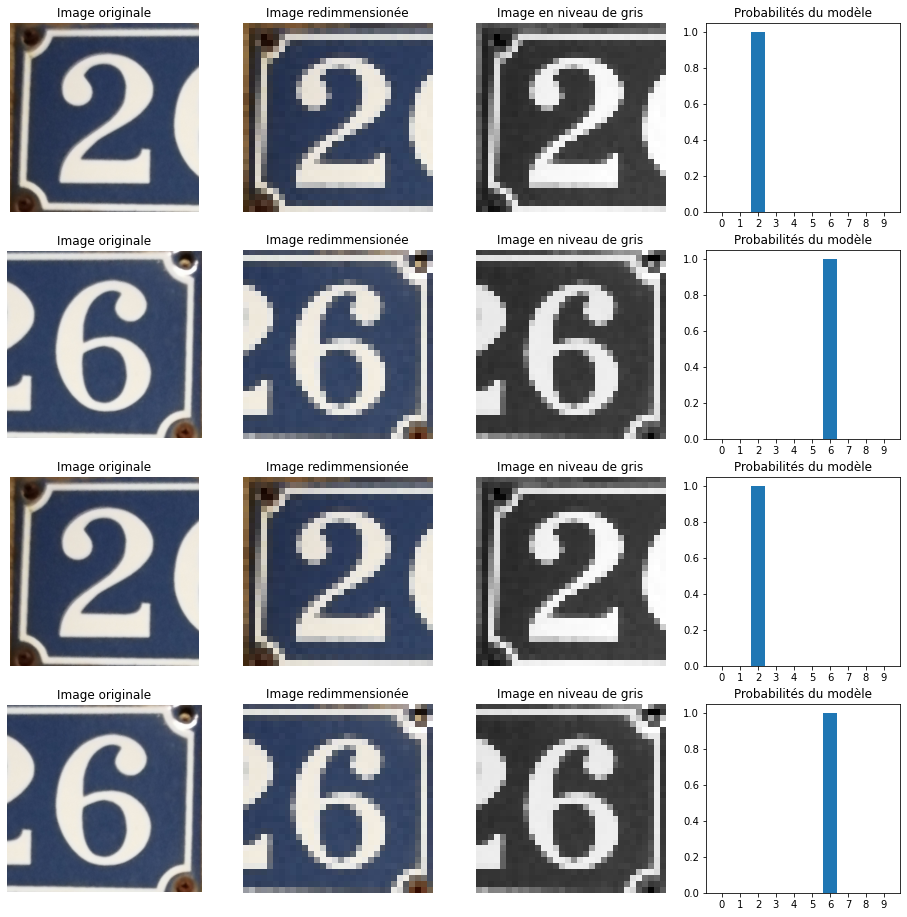

In [167]:
fig=plt.figure(figsize=(16, 16))
fig.tight_layout()
for i in range(len(images)):
    ax1=fig.add_subplot(len(images), 4, 4*i+1)
    ax1.axis('off')
    ax1.set_title('Image originale')
    ax1.imshow(images[i])
    ax2=fig.add_subplot(len(images), 4, 4*i+2)
    ax2.axis('off')
    ax2.set_title('Image redimmensionée')
    ax2.imshow(images_resize[i])
    ax3=fig.add_subplot(len(images), 4, 4*i+3)
    ax3.axis('off')
    ax3.set_title('Image en niveau de gris')
    ax3.imshow(images_bw[i],cmap='gray')
    ax4=fig.add_subplot(len(images), 4, 4*i+4)
    ax4.set_title('Probabilités du modèle')
    ax4.bar(np.linspace(0,9,10),proba[i])
    ax4.set_xticks(np.linspace(0,9,10))

    
    
    

In [163]:
proba

[array([3.4055574e-06, 5.4993498e-04, 9.9912125e-01, 2.5136836e-04,
        1.8259725e-06, 5.4099124e-05, 7.0758119e-06, 9.3589200e-08,
        6.9360754e-06, 4.0606938e-06], dtype=float32),
 array([2.7861168e-11, 1.8678023e-17, 1.5658645e-20, 1.1821373e-15,
        4.5189798e-21, 2.0092960e-15, 1.0000000e+00, 5.3075988e-23,
        2.1788708e-11, 3.4835469e-22], dtype=float32),
 array([3.4055574e-06, 5.4993498e-04, 9.9912125e-01, 2.5136836e-04,
        1.8259725e-06, 5.4099124e-05, 7.0758119e-06, 9.3589200e-08,
        6.9360754e-06, 4.0606938e-06], dtype=float32),
 array([2.7861168e-11, 1.8678023e-17, 1.5658645e-20, 1.1821373e-15,
        4.5189798e-21, 2.0092960e-15, 1.0000000e+00, 5.3075988e-23,
        2.1788708e-11, 3.4835469e-22], dtype=float32)]